<a href="https://colab.research.google.com/github/Ujoshna/OIBSIP/blob/main/oibsip_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/customer_segmentation_extended_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,customer_id,purchase_frequency,recency,average_purchase_value,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,...,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,5,130,188.82,66,Male,Hat,Clothing,149.75,California,...,Black,Summer,1.63,Active,Standard,False,True,39,Debit Card,Weekly
1,2,4,105,280.87,55,Female,Shoes,Accessories,35.32,Illinois,...,Green,Spring,2.38,Inactive,Express,False,False,2,PayPal,Yearly
2,3,4,27,54.91,57,Male,Shoes,Accessories,798.74,Illinois,...,Blue,Fall,3.90,Active,Express,False,True,46,Debit Card,Weekly
3,4,5,227,399.26,18,Female,Shoes,Footwear,604.14,New York,...,Red,Fall,1.06,Active,Overnight,True,True,32,Gift Card,Yearly
4,5,5,2,124.53,46,Male,Jeans,Accessories,713.82,California,...,Red,Spring,2.16,Inactive,Standard,True,True,41,Gift Card,Monthly


In [3]:
# Display basic information about the dataset
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             1000 non-null   int64  
 1   purchase_frequency      1000 non-null   int64  
 2   recency                 1000 non-null   int64  
 3   average_purchase_value  1000 non-null   float64
 4   Age                     1000 non-null   int64  
 5   Gender                  1000 non-null   object 
 6   Item Purchased          1000 non-null   object 
 7   Category                1000 non-null   object 
 8   Purchase Amount (USD)   1000 non-null   float64
 9   Location                1000 non-null   object 
 10  Size                    1000 non-null   object 
 11  Color                   1000 non-null   object 
 12  Season                  1000 non-null   object 
 13  Review Rating           1000 non-null   float64
 14  Subscription Status     1000 non-null   o

In [4]:
# Check for missing values
missing_values = data.isnull().sum()

# Handle missing values (if any)
data = data.dropna()  # Here, we simply drop rows with missing values

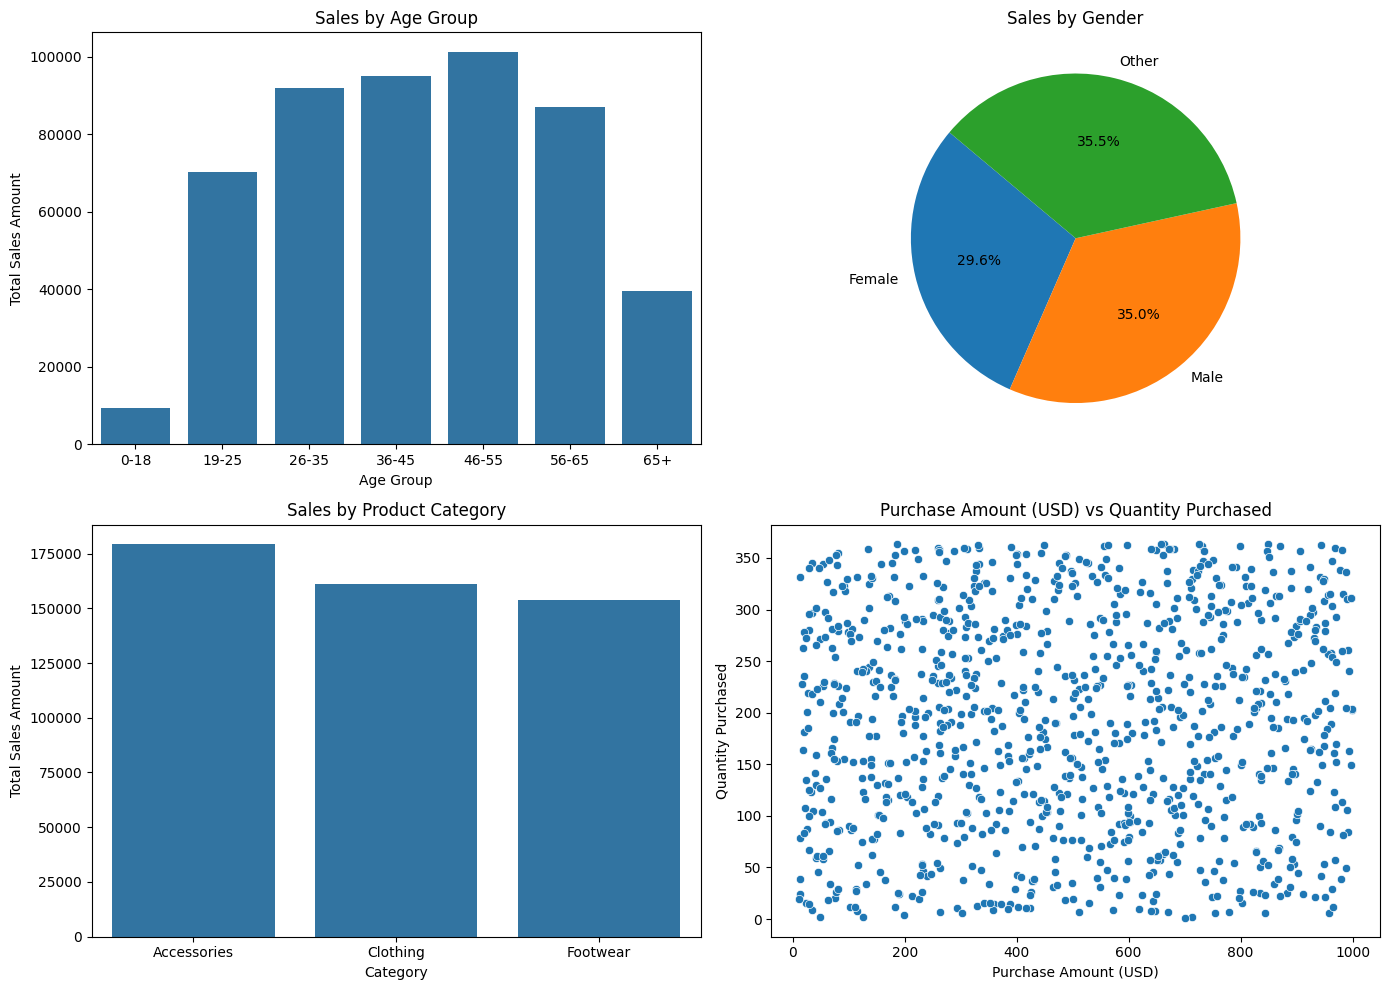

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data preparation (replace with your actual dataframe)
# df1 should be your original dataframe
# Here, we create age groups as an example of customer segmentation

data['Age Group'] = pd.cut(data['Age'], bins=[0, 18, 25, 35, 45, 55, 65, 100],
                          labels=['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+'])

# Summarize sales by age group
age_group_sales = data.groupby('Age Group')['Purchase Amount (USD)'].sum().reset_index()

# Summarize sales by gender
gender_sales = data.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index()

# Summarize sales by product category
category_sales = data.groupby('Category')['Purchase Amount (USD)'].sum().reset_index()

# Define the figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Bar plot for sales by age group
sns.barplot(x='Age Group', y='Purchase Amount (USD)', data=age_group_sales, ax=axes[0, 0])
axes[0, 0].set_title('Sales by Age Group')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Total Sales Amount')

# Pie chart for sales by gender
axes[0, 1].pie(gender_sales['Purchase Amount (USD)'], labels=gender_sales['Gender'], autopct='%1.1f%%', startangle=140)
axes[0, 1].set_title('Sales by Gender')

# Bar plot for sales by product category
sns.barplot(x='Category', y='Purchase Amount (USD)', data=category_sales, ax=axes[1, 0])
axes[1, 0].set_title('Sales by Product Category')
axes[1, 0].set_xlabel('Category')
axes[1, 0].set_ylabel('Total Sales Amount')

# Scatter plot for total amount vs quantity purchased
sns.scatterplot(x='Purchase Amount (USD)', y='recency', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Purchase Amount (USD) vs Quantity Purchased')
axes[1, 1].set_xlabel('Purchase Amount (USD)')
axes[1, 1].set_ylabel('Quantity Purchased')

# Adjust layout and display
plt.tight_layout()
plt.show()


In [14]:
# Summary statistics
summary_stats = data.describe()

# Display the cleaned dataset
data.head()
# Calculate average purchase value
average_purchase_value = data['Purchase Amount (USD)'].mean()

# Calculate frequency of purchases
purchase_frequency = data['customer_id'].value_counts().mean()

# Calculate total spending per customer
total_spending = data.groupby('customer_id')['Purchase Amount (USD)'].sum()

In [20]:
# Display key metrics
average_purchase_value, purchase_frequency, total_spending.head()
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import  warnings
# Ignore specific FutureWarning from sklearn
warnings.filterwarnings('ignore', category=FutureWarning, module='sklearn')

# Load the dataset
file_path = '/content/customer_segmentation_extended_dataset.csv'
data = pd.read_csv(file_path)

# Set n_init explicitly to suppress the warning
kmeans = KMeans(n_clusters=3, n_init=10)

# Fit the KMeans model (example)
kmeans.fit(features)


# ... (rest of your code up to handling missing values)

# Handle missing values (if any)
# Instead of dropping all rows with missing values, consider filling them
# with a suitable strategy like mean, median or a constant value.
data['Purchase Amount (USD)'].fillna(data['Purchase Amount (USD)'].mean(), inplace=True)
# Apply a similar strategy for other columns with missing values as needed.

# ... (rest of your code)

# Select features for clustering
features = data[['purchase_frequency', 'average_purchase_value', 'recency']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)  # This should now work without error

# ... (rest of your clustering code)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
features = data[['purchase_frequency', 'average_purchase_value', 'recency']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

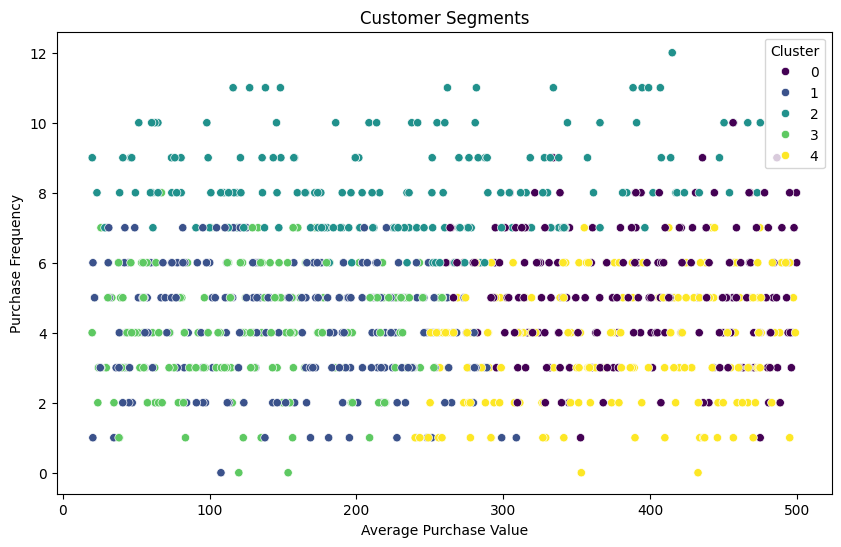

{0: 'Target high-value customers with premium offers.',
 1: 'Increase engagement with frequent buyers through loyalty programs.',
 2: 'Encourage recent buyers with timely promotions.',
 3: 'Win back lapsed customers with special discounts.',
 4: 'Retain new customers by enhancing their initial shopping experience.'}

In [21]:
# Summary statistics
summary_stats = data.describe()

# Display the cleaned dataset
data.head()
# Calculate average purchase value
average_purchase_value = data['Purchase Amount (USD)'].mean()

# Calculate frequency of purchases
purchase_frequency = data['customer_id'].value_counts().mean()

# Calculate total spending per customer
total_spending = data.groupby('customer_id')['Purchase Amount (USD)'].sum()
import warnings
from sklearn.cluster import KMeans

# Ignore specific FutureWarning from sklearn
warnings.filterwarnings('ignore', category=FutureWarning, module='sklearn')

# Display key metrics
average_purchase_value, purchase_frequency, total_spending.head()
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
file_path = '/content/customer_segmentation_extended_dataset.csv'
data = pd.read_csv(file_path)

# ... (rest of your code up to handling missing values)

# Handle missing values (if any)
# Instead of dropping all rows with missing values, consider filling them
# with a suitable strategy like mean, median or a constant value.
data['Purchase Amount (USD)'].fillna(data['Purchase Amount (USD)'].mean(), inplace=True)
# Apply a similar strategy for other columns with missing values as needed.

# ... (rest of your code)

# Select features for clustering
features = data[['purchase_frequency', 'average_purchase_value', 'recency']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)  # This should now work without error

# ... (rest of your clustering code)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
features = data[['purchase_frequency', 'average_purchase_value', 'recency']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Display the clustered data
data.head()
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot for customer segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_purchase_value', y='purchase_frequency', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Average Purchase Value')
plt.ylabel('Purchase Frequency')
plt.legend(title='Cluster')
plt.show()
# Analyze characteristics of each segment
segment_analysis = data.groupby('Cluster').agg({
    'Previous Purchases': ['mean', 'sum'],
    'purchase_frequency': 'mean',
    'recency': 'mean'
}).reset_index()

# Display segment analysis
segment_analysis

# Provide recommendations based on segment characteristics
recommendations = {
    0: "Target high-value customers with premium offers.",
    1: "Increase engagement with frequent buyers through loyalty programs.",
    2: "Encourage recent buyers with timely promotions.",
    3: "Win back lapsed customers with special discounts.",
    4: "Retain new customers by enhancing their initial shopping experience."
}

recommendations